In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mdn import MixtureDensityNetwork

# Example of Mixture Density Network with Full Covariance 

## generate data

In [2]:
data_size = 1024
mu_1, cov_1 = torch.tensor([0., 0.]), torch.tensor([[1, 0.75], [0.75, 1]])
mu_2, cov_2 = torch.tensor([0., 10.]), torch.tensor([[2., -1.8], [-1.8, 2]])
normal_1 = torch.distributions.MultivariateNormal(mu_1, cov_1)
normal_2 = torch.distributions.MultivariateNormal(mu_2, cov_2)
data = torch.cat([normal_1.rsample((data_size,)), normal_2.rsample((data_size,))])
x = torch.rand((2 * data_size, 1))

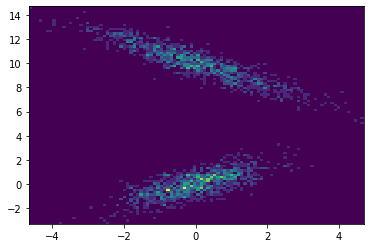

In [3]:
plt.hist2d(data[:, 0].numpy(), data[:, 1].numpy(), bins=100)
plt.show()

## Model
Note here we only use 2 Gaussians, but with full covariance matrices!

In [4]:
model = MixtureDensityNetwork(dim_in=1, dim_out=2, n_components=2, full_cov=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [5]:
for i in range(10000):
    optimizer.zero_grad()
    loss = model.loss(x, data).mean()
    loss.backward()
    optimizer.step()
    if i % 1000 == 0:
        print(f'epoch {i}, loss {loss.item()}')

epoch 0, loss 18.738622665405273
epoch 1000, loss 4.279388427734375
epoch 2000, loss 3.9659199714660645
epoch 3000, loss 3.368032217025757
epoch 4000, loss 3.2696938514709473
epoch 5000, loss 3.266528367996216
epoch 6000, loss 3.266526222229004
epoch 7000, loss 3.266526222229004
epoch 8000, loss 3.266525983810425
epoch 9000, loss 3.266526222229004


## Sampling

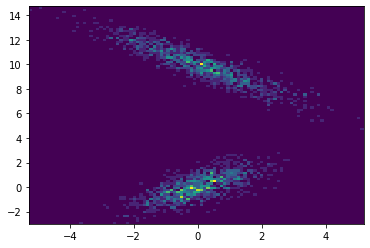

In [6]:
samples = model.sample(x)
plt.hist2d(samples[:, 0].numpy(), samples[:, 1].numpy(), bins=100)
plt.show()

## Parameters

In [7]:
pi, normal = model.forward(x)

In [8]:
print('pi: ', pi.probs[0])
print('mean: ', normal.loc[0])
print('cov: ', normal.covariance_matrix[0])

pi:  tensor([0.5110, 0.4890], grad_fn=<SelectBackward>)
mean:  tensor([[-0.0481, 10.1137],
        [ 0.0521,  0.0940]], grad_fn=<SelectBackward>)
cov:  tensor([[[ 2.2877, -2.0314],
         [-2.0314,  2.1936]],

        [[ 1.0534,  0.7548],
         [ 0.7548,  1.0153]]], grad_fn=<SelectBackward>)
